# Kaggle 캐글

https://kaggle.com

캐글은 머신러닝 엔지니어가 레벨업 할 수 있는 던전이자, 사냥터입니다. 수많은 공개된 데이터셋과 각 데이터셋 별로 사람들이 분석한 결과들을 모아놓은 플랫폼이죠.

기업 및 단체에서 Prize를 걸고 데이터와 해결 과제를 등록하면, 데이터 사이언티스트들이 이를 해결하기 위해 모델을 개발하고 경쟁하기도 하는 플랫폼입니다.

## Colab에서 Kaggle 데이터셋 다운로드 방법

1. [Kaggle](https://www.kaggle.com) 회원가입
2. Account(계정) 페이지 진입 (https://www.kaggle.com/[사옹자이름]/account)
3. API - Create New API Token 클릭하고 kaggle.json 다운로드
4. 브라우저에서 json 파일을 열어 username 및 key 복사
5. 아래 코드에 자신의 username 및 key를 붙여넣어 환경변수 설정 실행

## 연차 연봉 데이터셋 다운로드

1. Kaggle에서 원하는 데이터셋을 검색 (예: https://www.kaggle.com/ashydv/advertising-dataset)
2. [Copy API command] 버튼 클릭 (New Notebook 옆에 ... 버튼 클릭)
3. 코드 셀에 붙여넣고 실행! (맨 앞에 "!" 꼭 붙이는거 잊지 마세요!)



In [ ]:
!kaggle datasets download -d rsadiq/salary


Dataset URL: https://www.kaggle.com/datasets/rsadiq/salary
License(s): unknown
  0% 0.00/392 [00:00<?, ?B/s]
100% 392/392 [00:00<00:00, 169kB/s]


데이터셋 압축 해제

In [ ]:
!unzip salary.zip

Archive:  salary.zip
  inflating: Salary.csv              


##  광고 데이터 예측 (Single-variable linear regression)

TV 광고 금액으로 Sales 예측하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터셋 로드

In [ ]:
df = pd.read_csv('/content/Salary.csv')
# df.head(5)
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [ ]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### 데이터셋 크기 살펴보기

In [ ]:
print(df.shape)

(35, 2)


### 데이터셋 살짝 살펴보기

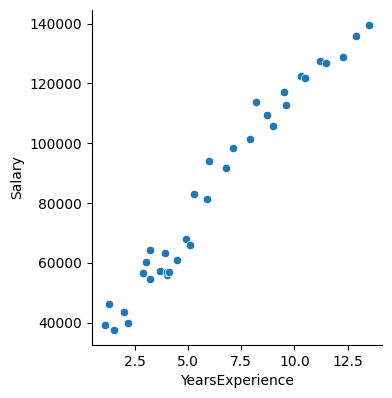

In [ ]:
sns.pairplot(df, x_vars=['YearsExperience'], y_vars=['Salary'], height=4)

### 데이터셋 가공

In [ ]:
x_data = np.array(df[['YearsExperience']], dtype=np.float32)
y_data = np.array(df['Salary'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

(35, 1)
(35,)


In [ ]:
x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(35, 1)
(35, 1)


### 데이터셋 분할

학습 데이터 80%
검증 데이터 20%

참고) 강의에서는 편의를 위해 테스트 데이터를 나누지 않았습니다. 실무에서는 꼭 학습/검증/테시트 데이터를 나누는 것 잊지마세요!

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=None)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(28, 1) (7, 1)
(28, 1) (7, 1)


### 학습

In [ ]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

Epoch 1/100
1/1 [==============================] - 1s 730ms/step - loss: 8664684544.0000 - val_loss: 144184528.0000
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 520511712.0000 - val_loss: 311869184.0000
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 218535216.0000 - val_loss: 245432736.0000
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 205776752.0000 - val_loss: 254777216.0000
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 203699360.0000 - val_loss: 250788720.0000
Epoch 6/100
1/1 [==============================] - 0s 73ms/step - loss: 202031024.0000 - val_loss: 249413072.0000
Epoch 7/100
1/1 [==============================] - 0s 68ms/step - loss: 200392752.0000 - val_loss: 247559552.0000
Epoch 8/100
1/1 [==============================] - 0s 49ms/step - loss: 198770528.0000 - val_loss: 245817328.0000
Epoch 9/100
1/1 [==============================] - 0s 48ms/step - loss: 197163568.0000

### 검증 데이터로 예측하기

1/1 [==============================] - 0s 48ms/step


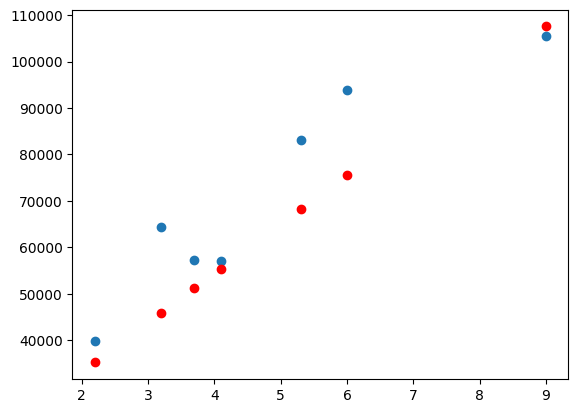

In [ ]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()

## 연차에 따른 연봉 예측하기

연차에 따른 연수로 연봉금액을 예측하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/Salary.csv')

x_data = np.array(df[['YearsExperience']], dtype=np.float32)
y_data = np.array(df['Salary'], dtype=np.float32)

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

(35, 1)
(35, 1)
(28, 1) (7, 1)
(28, 1) (7, 1)
Epoch 1/100
1/1 [==============================] - 0s 445ms/step - loss: 8664347648.0000 - val_loss: 144184048.0000
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 520499200.0000 - val_loss: 311868256.0000
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 218535056.0000 - val_loss: 245433392.0000
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 205777152.0000 - val_loss: 254777568.0000
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 203699808.0000 - val_loss: 250789136.0000
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 202031440.0000 - val_loss: 249413584.0000
Epoch 7/100
1/1 [==============================] - 0s 39ms/step - loss: 200393136.0000 - val_loss: 247559792.0000
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 198770800.0000 - val_loss: 245817728.0000
Epoch 9/100
1/1 [=======================

In [ ]:
y_pred = model.predict(x_val)

print(y_pred.shape)

1/1 [==============================] - 0s 52ms/step
(7, 1)


## 연차와 연봉의 예측 그래프(산점도)


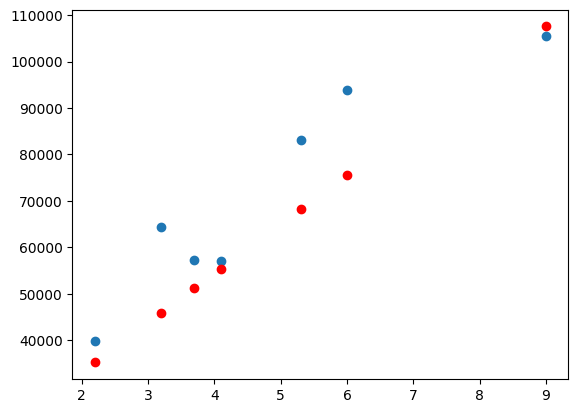

In [ ]:
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')
plt.show()